<a href="https://colab.research.google.com/github/shvhmeer786/JAVAarcade/blob/main/Using_AI_to_Detect_Distracted_Driving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using AI to Detect Distracted Driving

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = "/content/drive/My Drive/ai hackathon/dataset"
dataset = pd.read_csv(path+"/driver_imgs_list.csv")

In [ ]:
dataset.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [ ]:
labels = {'c0': 'Safe driving', 
          'c1': 'Texting - right', 
          'c2': 'Talking on the phone - right', 
          'c3': 'Texting - left', 
          'c4': 'Talking on the phone - left', 
          'c5': 'Operating the radio', 
          'c6': 'Drinking', 
          'c7': 'Reaching behind', 
          'c8': 'Hair and makeup', 
          'c9': 'Talking to passenger'}

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
train_dir = path+"/train"
test_dir = path+"/test"
for i in os.listdir(train_dir):
    plt.figure(figsize=(50,50))
    for num in range(1,11):
            for images, image_name in enumerate(os.listdir(train_dir+"/"+i)[0:1]):
                filepath = train_dir + "/" + i + "/" + image_name
                img = mpimg.imread(filepath)
                plt.subplot(1,5,num)
                plt.title(labels[i])
                plt.imshow(img)
            break

In [ ]:
import tensorflow as tf keras.numpy
from tensorflow.keras.preprocessi+ng.image import ImageDataGenerator
tf.test.gpu_device_name()

In [ ]:
augment_train_data = ImageDataGenerator(rescale = 1.0/255, 
                                        validation_split = 0.1)

train_set = augment_train_data.flow_from_directory(train_dir, 
                                                   target_size = (100, 100), 
                                                   batch_size = 32,
                                                   subset = 'training')

val_set = augment_train_data.flow_from_directory(train_dir, 
                                                 target_size = (100, 100), 
                                                 batch_size = 32,
                                                 subset = 'validation')

In [ ]:
train_set

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(128,(3, 3), activation='relu',input_shape = (100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation ='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 32)       

In [ ]:
history = model.fit(train_set,
          epochs = 10,
          # validation_data = val_set,
          batch_size=32,
          steps_per_epoch=22424/32,
          shuffle=True)

ValueError: ignored

In [ ]:
from datetime import datetime
from pytz import timezone

est = datetime.now(timezone('EST'))
time = est.strftime("%y-%m-%d %H:%M")
model.save(f"/content/drive/My Drive/ai hackathon/models/{time}-loss-{round(history.history['loss'][-1], 3)}-accuracy-{round(history.history['accuracy'][-1], 3)}-val_loss-{round(history.history['val_loss'][-1], 3)}-val_accuracy-{round(history.history['val_accuracy'][-1], 3)}.h5")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

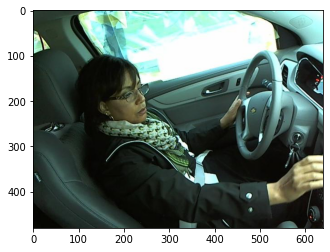

In [ ]:
plt.imshow(pred_img)

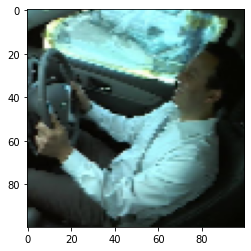

In [ ]:
plt.imshow(val_test[0][0])

In [ ]:
from PIL import Image

def predict_image():
  loaded_model = tf.keras.models.load_model('/content/drive/My Drive/ai hackathon/models/20-10-13 17:25-loss-0.044-accuracy-0.988-val_loss-0.052-val_accuracy-0.986.h5')
  pred_img = Image.open("/content/drive/My Drive/img_4.jpg").convert("RGB") #reaching back
  pred_img = pred_img.resize((100,100))
  pred_img = np.array(pred_img, dtype="float32")
  pred_img = np.expand_dims(pred_img, axis=0)
  pred_img /= 255.0
  pred_img = tf.convert_to_tensor(pred_img)

  labels = {0: 'Safe driving', 1: 'Texting - right', 2: 'Talking on the phone - right', 3: 'Texting - left', 4: 'Talking on the phone - left', 5: 'Operating the radio', 
            6: 'Drinking', 7: 'Reaching behind', 8: 'Hair and makeup', 9: 'Talking to passenger'}
  return labels[np.argmax(loaded_model.predict(pred_img))]

predict_image()

'Talking on the phone - right'